* Implementing Simple Linear Regression
* Dataset link : https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams?resource=download

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.shape

(1000, 8)

* Statistics about the data

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


* Exploratory data analysis

In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

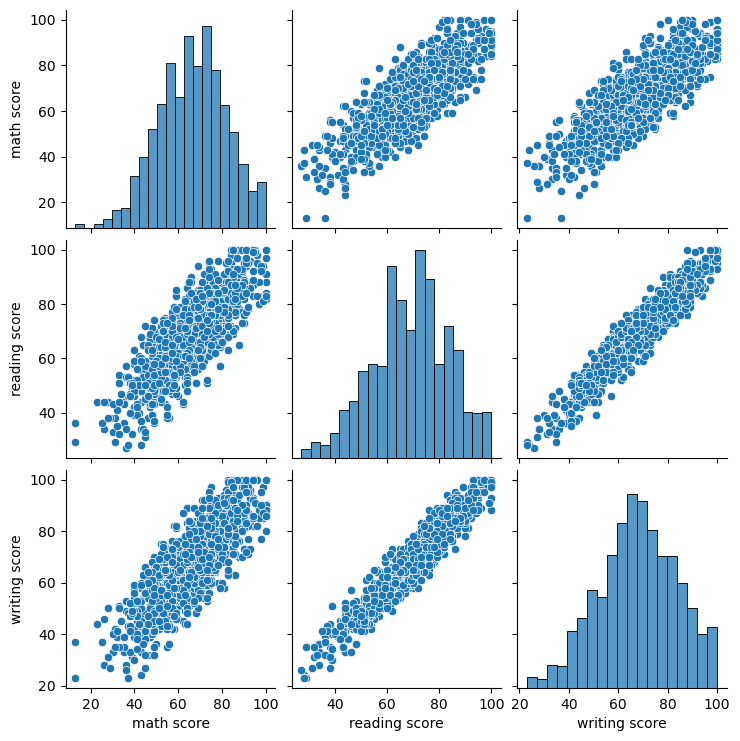

In [12]:
# visualizing the data distribution 

sns.pairplot(df)
plt.show()

Correlation Matrix:
               math score  reading score  writing score
math score       1.000000       0.819398       0.805944
reading score    0.819398       1.000000       0.954274
writing score    0.805944       0.954274       1.000000


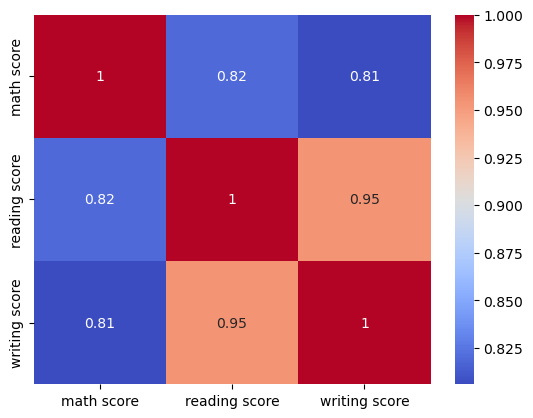

In [15]:
# Finding data correlation 

print('Correlation Matrix:')
print(df.corr(numeric_only=True))

sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [17]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


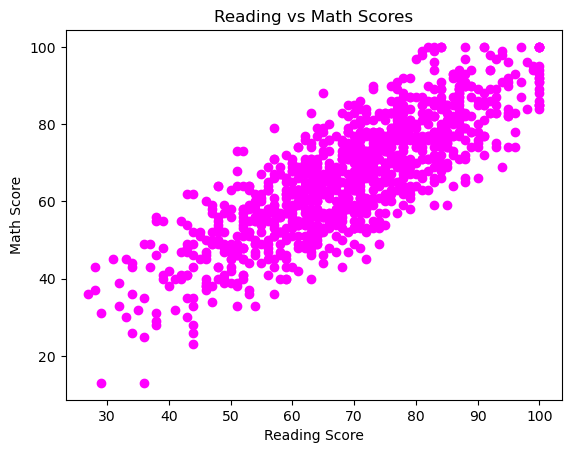

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df['reading score'], df['math score'], color='magenta')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.title('Reading vs Math Scores')
plt.show()


In [20]:
# split the data 
from sklearn.model_selection import train_test_split

X = df[['reading score']]   # independent variable
y = df['math score']        # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


In [21]:
# Train the model 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])


Intercept (b0): 6.450831186254348
Coefficient (b1): 0.8662271081462334


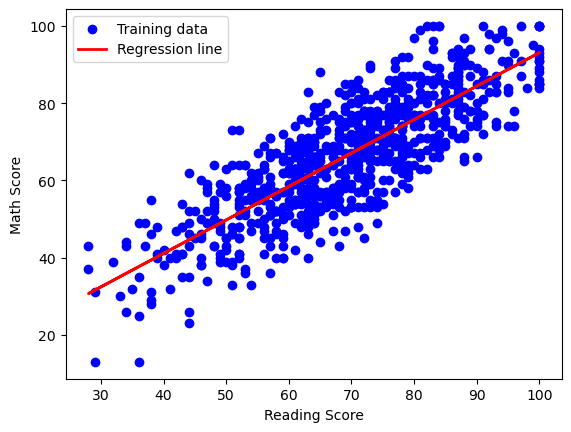

In [ ]:
# visualizing the regression line [ best fit line]
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.plot(X_train, model.predict(X_train), color="red", linewidth=2, label="Regression line")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.legend()
plt.show()


In [24]:
# Making the Prediction

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 6.880693092095026
Mean Squared Error: 77.63912144015056
Root Mean Squared Error: 8.811306454785838
R² Score: 0.6682907823072719


In [25]:
# Custom input prediction 

predicted_score = model.predict([[90]])
print(f"Predicted Math Score for reading score 90 = {predicted_score[0]:.2f}")


Predicted Math Score for reading score 90 = 84.41


c:\Users\THUND3R\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
